In [1]:
import cPickle as pkl
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import cPickle as pkl

from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
descriptor = '_constant_tRNAs'

In [4]:
dft = pkl.load(open('../../results/dft' + descriptor + '.p', 'r'))

In [5]:
dft.head(n=10)

,ribosomes,transcripts,index,geneID,init_rate,length,tic_toc
0,1000,28808,0,YBR177C,0.000002,1356,77.60
1,1000,28808,1,YBR177C,0.000002,1356,NaN
2,1000,28808,2,YBR177C,0.000002,1356,NaN
3,1000,28808,3,YBR177C,0.000002,1356,69.05
4,1000,28808,4,YIL140W,0.000002,2472,NaN
5,1000,28808,5,YIL140W,0.000002,2472,122.10
6,1000,28808,6,YLR268W,0.000002,645,42.80
7,1000,28808,7,YLR268W,0.000002,645,34.75
8,1000,28808,8,YLR268W,0.000002,645,NaN
9,1000,28808,9,YLR268W,0.000002,645,NaN


In [6]:
dftnotnan = dft[dft.tic_toc.notnull()]
del dftnotnan['index']

In [7]:
dftnotnan.head(n=10)

,ribosomes,transcripts,geneID,init_rate,length,tic_toc
0,1000,28808,YBR177C,1.644214e-06,1356,77.600
3,1000,28808,YBR177C,1.644214e-06,1356,69.050
5,1000,28808,YIL140W,1.649229e-06,2472,122.100
6,1000,28808,YLR268W,1.844285e-06,645,42.800
7,1000,28808,YLR268W,1.844285e-06,645,34.750
11,1000,28808,YOR011W,2.686820e-07,4185,209.050
12,1000,28808,YPL043W,2.096261e-06,2058,90.675
14,1000,28808,YPL043W,2.096261e-06,2058,84.500
17,1000,28808,YJL155C,1.490352e-06,1359,72.050
20,1000,28808,YHR067W,6.017500e-07,843,41.250


Calculate mean tic_tocs:

In [8]:
dft_grouped = dftnotnan.groupby(['geneID', 'init_rate', 'length', 'ribosomes', 'transcripts'], as_index=False).mean()

Calculate ribosome speeds:

In [9]:
dft_grouped['ribosome_speed'] = dft_grouped.length / dft_grouped.tic_toc / 3.

In [10]:
dft_grouped.head(n=20)

,geneID,init_rate,length,ribosomes,transcripts,tic_toc,ribosome_speed
0,YAL001C,7.602266e-07,3483,1000,28808,200.550000,5.789080
1,YAL001C,7.602266e-07,3483,1000,57558,189.700000,6.120190
2,YAL001C,7.602266e-07,3483,2000,28808,192.400000,6.034304
3,YAL001C,7.602266e-07,3483,2000,57558,193.550000,5.998450
4,YAL001C,7.602266e-07,3483,5000,28808,191.550000,6.061081
5,YAL001C,7.602266e-07,3483,5000,57558,200.025000,5.804274
6,YAL001C,7.602266e-07,3483,10000,28808,186.325000,6.231048
7,YAL001C,7.602266e-07,3483,10000,57558,186.883333,6.212432
8,YAL001C,7.602266e-07,3483,20000,28808,185.712500,6.251599
9,YAL001C,7.602266e-07,3483,20000,57558,184.993750,6.275888


Next step: produce series by number of ribosomes.

We want to only include genes for which we have all 9 ribosome counts in the table.

In [11]:
gene_count_28808 = pd.DataFrame(dft_grouped[dft_grouped.transcripts==28808]['geneID'].value_counts())
gene_count_28808 = gene_count_28808[gene_count_28808['geneID']==9]
gene_count_28808.columns =  ['data_count']
len(gene_count_28808)

1955

In [12]:
gene_count_57558 = pd.DataFrame(dft_grouped[dft_grouped.transcripts==57558]['geneID'].value_counts())
gene_count_57558 = gene_count_57558[gene_count_57558['geneID']==9]
gene_count_57558.columns =  ['data_count']
len(gene_count_57558)

2289

In [13]:
dft_selected_28808 = pd.merge(gene_count_28808, dft_grouped[dft_grouped.transcripts==28808], left_index = True, right_on='geneID')
dft_selected_57558 = pd.merge(gene_count_57558, dft_grouped[dft_grouped.transcripts==57558], left_index = True, right_on='geneID')

In [14]:
dft_selected_28808.head(n=19)

,data_count,geneID,init_rate,length,ribosomes,transcripts,tic_toc,ribosome_speed
4409,9,YBR177C,0.000002,1356,1000,28808,73.325000,6.164337
4411,9,YBR177C,0.000002,1356,2000,28808,66.733333,6.773227
4413,9,YBR177C,0.000002,1356,5000,28808,73.125000,6.181197
4415,9,YBR177C,0.000002,1356,10000,28808,69.177500,6.533916
4417,9,YBR177C,0.000002,1356,20000,28808,64.883259,6.966358
4419,9,YBR177C,0.000002,1356,50000,28808,62.322917,7.252549
4421,9,YBR177C,0.000002,1356,100000,28808,57.814844,7.818061
4423,9,YBR177C,0.000002,1356,200000,28808,51.245692,8.820254
4425,9,YBR177C,0.000002,1356,500000,28808,47.439674,9.527890
43162,9,YLL023C,0.000002,840,1000,28808,40.925000,6.841784


In [15]:
ribosomes = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000]

https://stackoverflow.com/questions/37967786/axes-from-plt-subplots-is-a-numpy-ndarray-object-and-has-no-attribute-plot

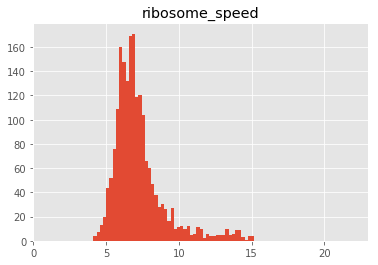

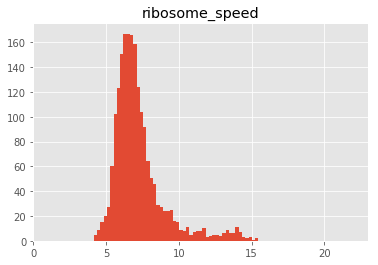

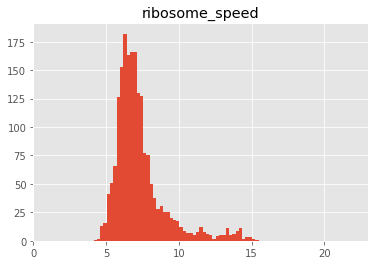

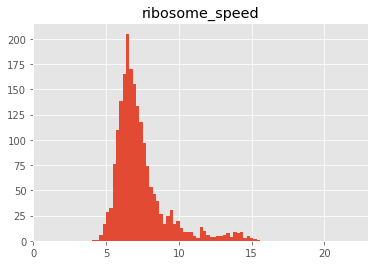

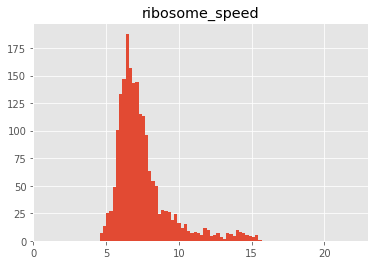

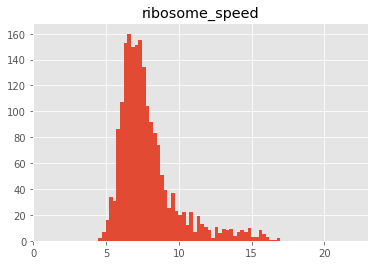

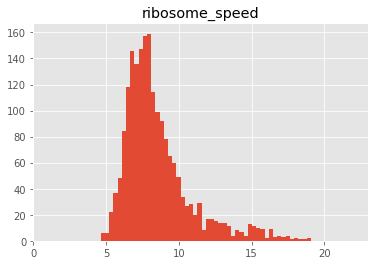

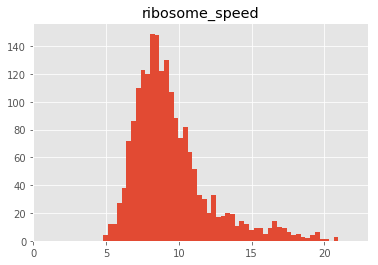

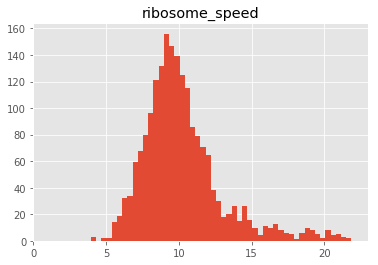

In [16]:
for ribos in ribosomes:
    ax = dft_selected_28808[dft_selected_28808.ribosomes==ribos].hist(column='ribosome_speed', bins=50)
    ax[0, 0].set_xlim([0, 23]) 

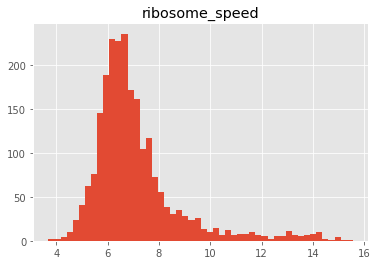

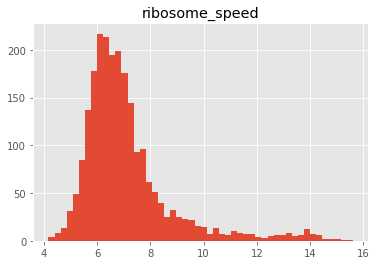

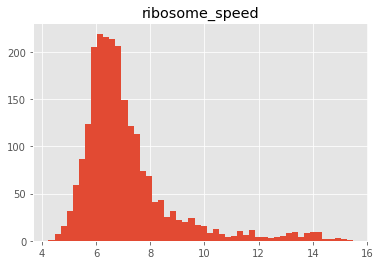

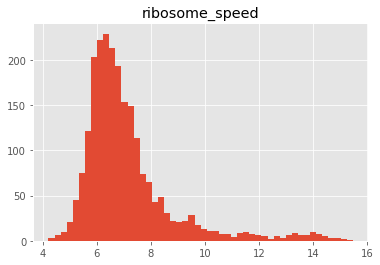

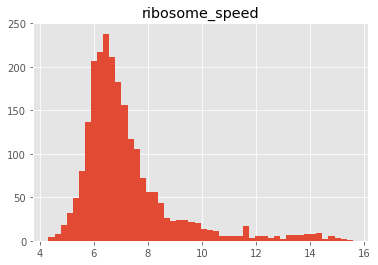

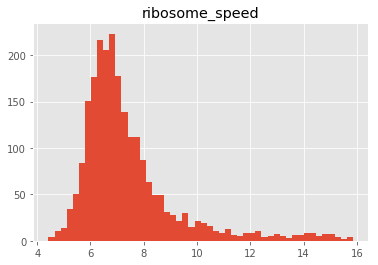

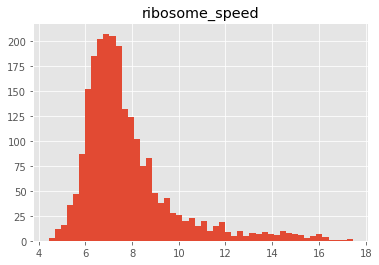

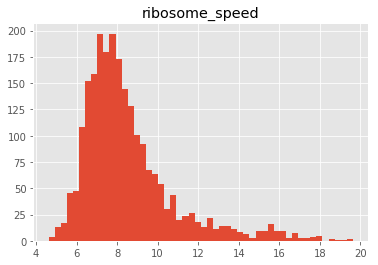

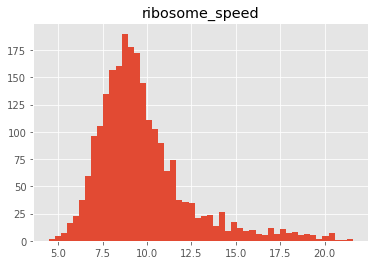

In [17]:
for ribos in ribosomes:
    dft_selected_57558[dft_selected_57558.ribosomes==ribos].hist(column='ribosome_speed', bins=50)

Looks interesting. Check the statistics:

In [18]:
for ribos in ribosomes:
    print
    print ribos
    print dft_selected_28808[dft_selected_28808.ribosomes==ribos][['tic_toc', 'ribosome_speed']].describe()


1000
           tic_toc  ribosome_speed
count  1955.000000     1955.000000
mean     61.879301        7.262500
std      45.706128        1.819670
min       3.185074        4.130719
25%      30.625000        6.128842
50%      50.600000        6.851312
75%      78.491667        7.726776
max     402.916667       15.187673

2000
           tic_toc  ribosome_speed
count  1955.000000     1955.000000
mean     61.753434        7.263456
std      45.484302        1.805149
min       3.250280        4.162896
25%      30.650000        6.159603
50%      50.200000        6.826725
75%      78.286219        7.721965
max     408.837500       15.473741

5000
           tic_toc  ribosome_speed
count  1955.000000     1955.000000
mean     61.395202        7.296336
std      45.064372        1.808374
min       3.163245        4.140297
25%      30.640030        6.201830
50%      49.625000        6.860210
75%      77.490278        7.712965
max     384.950000       15.482458

10000
           tic_toc  ribosome_s

In [19]:
for ribos in ribosomes:
    print
    print ribos
    print dft_selected_57558[dft_selected_57558.ribosomes==ribos][['tic_toc', 'ribosome_speed']].describe()


1000
           tic_toc  ribosome_speed
count  2289.000000     2289.000000
mean     64.611363        7.095072
std      46.694224        1.736521
min       3.195160        3.693878
25%      33.600000        6.088254
50%      53.016667        6.666667
75%      80.250000        7.538036
max     390.200000       15.555205

2000
           tic_toc  ribosome_speed
count  2289.000000     2289.000000
mean     64.487230        7.107369
std      46.735224        1.723264
min       3.315842        4.166485
25%      32.968750        6.073030
50%      52.515278        6.696645
75%      80.900000        7.540026
max     399.892857       15.608735

5000
           tic_toc  ribosome_speed
count  2289.000000     2289.000000
mean     64.323059        7.108690
std      46.472272        1.717415
min       2.566667        4.240688
25%      33.092500        6.088795
50%      52.264881        6.658260
75%      80.675000        7.489501
max     390.470000       15.476380

10000
           tic_toc  ribosome_s

Un-melt data to access ribosomes (https://stackoverflow.com/questions/22127569/opposite-of-melt-in-python-pandas):

In [20]:
dft_times = dft_selected_28808.pivot(index='geneID', columns='ribosomes')['tic_toc']
dft_times.head(n=10)

ribosomes,1000,2000,5000,10000,20000,50000,100000,200000,500000
geneID,,,,,,,,,
YAL001C,200.550000,192.400000,191.550000,186.325000,185.712500,167.933750,151.254167,135.964732,121.613889
YAL003W,14.516073,14.610487,14.574735,14.414097,14.170884,13.403651,12.307605,11.045274,10.123441
YAL012W,45.212698,45.256705,44.574259,44.733931,42.666203,38.761289,34.445578,31.515185,38.516758
YAL014C,53.550000,46.700000,52.087500,55.165000,54.251905,54.410690,52.920726,49.821136,44.534447
YAL016W,96.500000,94.300000,95.058333,92.650000,89.497321,86.115278,74.641987,65.691979,60.775439
YAL019W,171.966667,166.400000,171.300000,172.085000,168.001667,157.891500,139.633810,123.057679,108.589000
YAL023C,107.300000,100.000000,101.488095,102.055476,98.572500,92.605315,83.198041,73.745526,65.637264
YAL025C,42.300000,40.475000,41.170000,39.407500,38.716176,37.226136,32.852500,29.971726,32.111687
YAL030W,23.275000,21.000000,21.088889,20.113889,19.954762,19.567083,19.318821,18.276344,17.101412


Time for many ribosomes as percent of time for few ribosomes:

In [21]:
gene_count_28808['tic_toc_acceleration_percent'] = dft_times[500000] / dft_times[1000]
gene_count_28808['tic_toc_acceleration_absolute'] = dft_times[500000] - dft_times[1000]

In [22]:
combined = pd.merge(dft_selected_28808, gene_count_28808, left_on='geneID', 
         right_index=True).groupby(['geneID', 'init_rate', 'length', 'transcripts'], as_index=False).mean()
combined.head(n=10)

,geneID,init_rate,length,transcripts,data_count_x,ribosomes,tic_toc,ribosome_speed,data_count_y,tic_toc_acceleration_percent,tic_toc_acceleration_absolute
0,YAL001C,7.602266e-07,3483,28808,9,98666,170.367115,7.004662,9,0.606402,-78.936111
1,YAL003W,5.982788e-06,621,28808,9,98666,13.240694,15.894449,9,0.697395,-4.392632
2,YAL012W,4.492416e-06,1185,28808,9,98666,40.631401,9.873428,9,0.851901,-6.695940
3,YAL014C,5.842229e-07,768,28808,9,98666,51.493489,4.996184,9,0.831642,-9.015553
4,YAL016W,1.918107e-06,1908,28808,9,98666,83.914482,7.783229,9,0.629797,-35.724561
5,YAL019W,8.479339e-07,3396,28808,9,98666,153.213925,7.578887,9,0.631454,-63.377667
6,YAL023C,1.318002e-06,2280,28808,9,98666,91.622469,8.506078,9,0.611717,-41.662736
7,YAL025C,4.348961e-06,921,28808,9,98666,37.136747,8.379384,9,0.759142,-10.188313
8,YAL030W,1.672338e-06,354,28808,9,98666,19.966244,5.951024,9,0.734755,-6.173588
9,YAL035W,2.544072e-06,3009,28808,9,98666,93.955450,11.052194,9,0.617327,-42.768505


In [23]:
def scatter_dicts(dict1, dict2, xaxislabel=None, yaxislabel=None, fontsize=None, markersize=20,
                  alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=True, ylog=True):
    plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
    print len(plotkeys)
    xs = [dict1[key] for key in plotkeys]
    ys = [dict2[key] for key in plotkeys] 

    fig =  plt.figure(figsize=figsize)                

    ax = fig.add_subplot(111)
    #ax.set_rasterization_zorder(1)
    
    ax.grid(True, linestyle = '-', color = '0.75')
    if xlog:
        ax.set_xscale('log')
    else:
        ax.set_xscale('linear')
    if ylog:
        ax.set_yscale('log')
    else:
        ax.set_yscale('linear')
    if xaxislabel:
        ax.set_xlabel(xaxislabel)
        if fontsize:
            ax.set_xlabel(xaxislabel, fontsize=fontsize)
            plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    if yaxislabel:
        ax.set_ylabel(yaxislabel)
        if fontsize:
            ax.set_ylabel(yaxislabel, fontsize=fontsize)
            plt.setp(ax.get_yticklabels(), fontsize=fontsize)

    scat = plt.scatter(xs, ys,
                       #c=plt.rcParams['axes.color_cycle'][0], 
                       #c=myfacecolor, 
                       #edgecolor=plt.rcParams['patch.edgecolor'],
                       #edgecolor=myedgecolor,
                       s=markersize, zorder=0)
    scat.set_alpha(alpha)
    #scat.set_color()
    #scat.set_edgecolors(plt.rcParams['patch.edgecolor'])
    # , color=, edgecolor=

    points = zip(xs, ys)
    sorted_points = sorted(points)
    new_xs = [point[0] for point in sorted_points][:-2]  # modify to remove outliers 
    new_ys = [point[1] for point in sorted_points][:-2]  # modify to remove outliers
    ylowess = lowess(new_ys, new_xs)[:,1]
    plt.plot(new_xs, ylowess, plt.rcParams['axes.color_cycle'][1], linewidth=4)

    ax.set_rasterization_zorder(1)

    plt.savefig(filename, bbox_inches='tight', dpi=200)

In [24]:
dict_length = dict(zip(combined.geneID, combined.length))
dict_tic_toc_acceleration_percent = dict(zip(combined.geneID, combined.tic_toc_acceleration_percent))

1955


/home/martin/.local/lib/python2.7/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


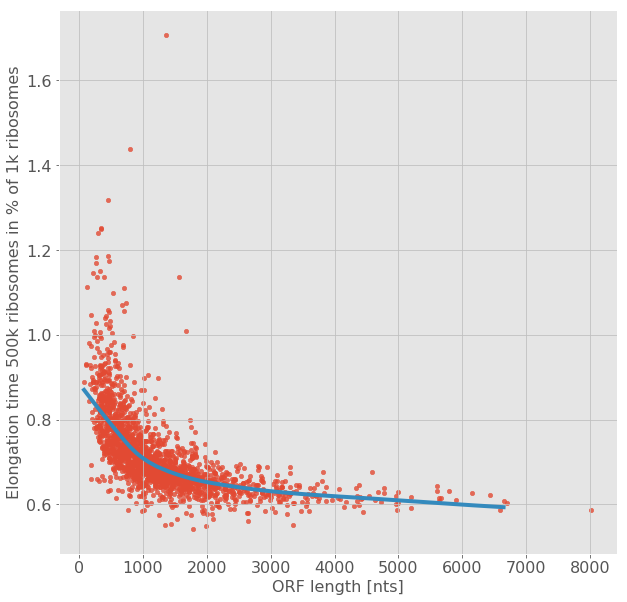

In [25]:
scatter_dicts(dict_length, dict_tic_toc_acceleration_percent, xaxislabel='ORF length [nts]', 
              yaxislabel='Elongation time 500k ribosomes in % of 1k ribosomes', fontsize=16, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=False,
             ylog=False)

Values below 1 mean that with many ribosomes elongation is faster than with fewer ribosomes.

In [26]:
dict_tic_toc_acceleration_absolute = dict(zip(combined.geneID, combined.tic_toc_acceleration_absolute))

1955


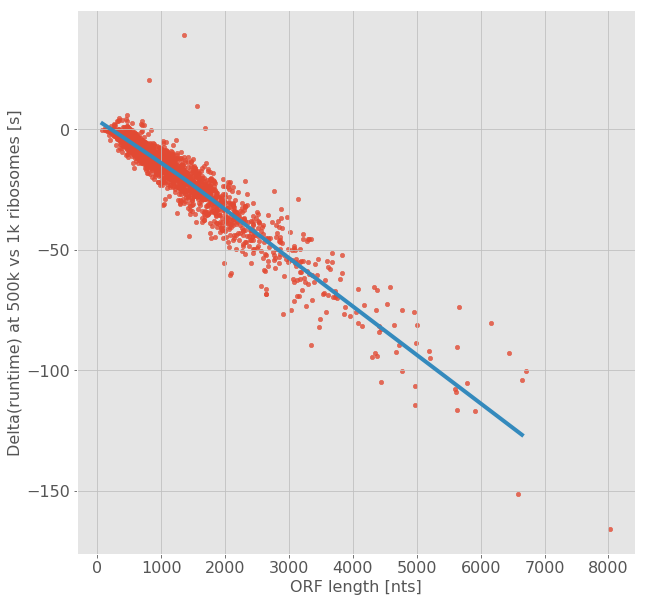

In [27]:
scatter_dicts(dict_length, dict_tic_toc_acceleration_absolute, xaxislabel="ORF length [nts]", 
              yaxislabel="Delta(runtime) at 500k vs 1k ribosomes [s]", fontsize=16, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=False,
             ylog=False)

This is as expected, with the absolute time saving roughly proportional to ORF length.

Just a check ('cigar graph'):

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


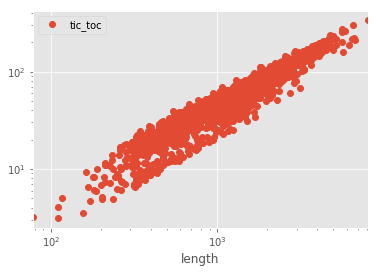

In [28]:
ax = combined.sort('length').plot(x='length', y='tic_toc', style='o')
ax.set_yscale('log')
ax.set_xscale('log')

In [29]:
dict_init_rate = dict(zip(combined.geneID, combined.init_rate))
dict_tic_toc_acceleration_percent = dict(zip(combined.geneID, combined.tic_toc_acceleration_percent))

1955


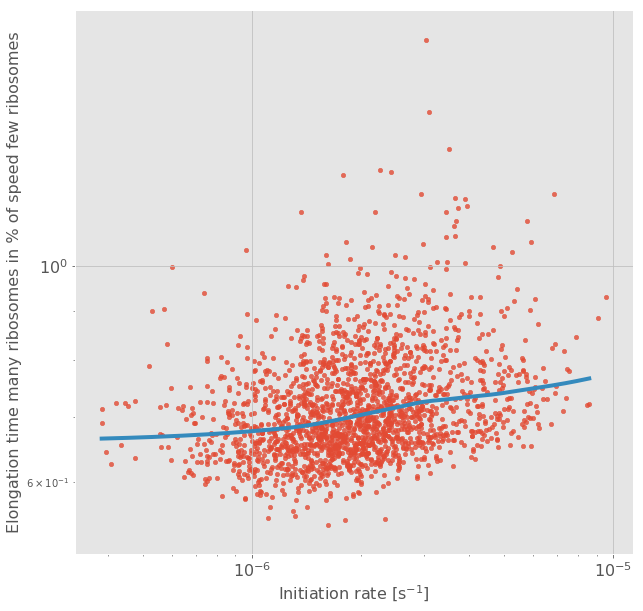

In [44]:
scatter_dicts(dict_init_rate, dict_tic_toc_acceleration_percent, xaxislabel='Initiation rate [s$^ {-1}$]', 
              yaxislabel='Elongation time many ribosomes in % of speed few ribosomes', fontsize=16, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=True, 
              ylog=True)

Interesting. There is an increase of `tic_toc_acceleration_percent` with initiation rate.

1955


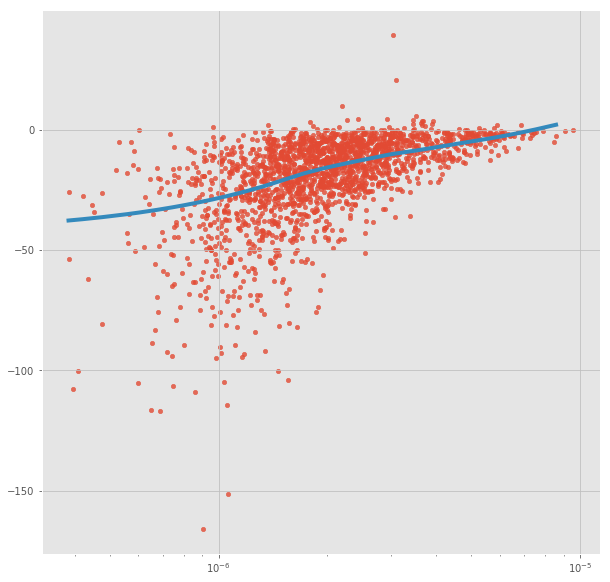

In [31]:
scatter_dicts(dict_init_rate, dict_tic_toc_acceleration_absolute, xaxislabel=None, yaxislabel=None, fontsize=None, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=True,
             ylog=False)

There is also an increase of `tic_toc_acceleration_absolute` with initiation rate.

This is not an effect of the connection between length and initiation rate, shown in the following chart.

Increasing initiation rate $\Longrightarrow$ decreasing ORF length $\Longrightarrow$ _decreasing acceleration_


So the length effect even overcompensates this effect!?

Let's try to explain it as follows:

Few ribosomes (slow elongation time) --- many ribosomes (fast elongation time)

DIRECT or INDIRECT?

1955


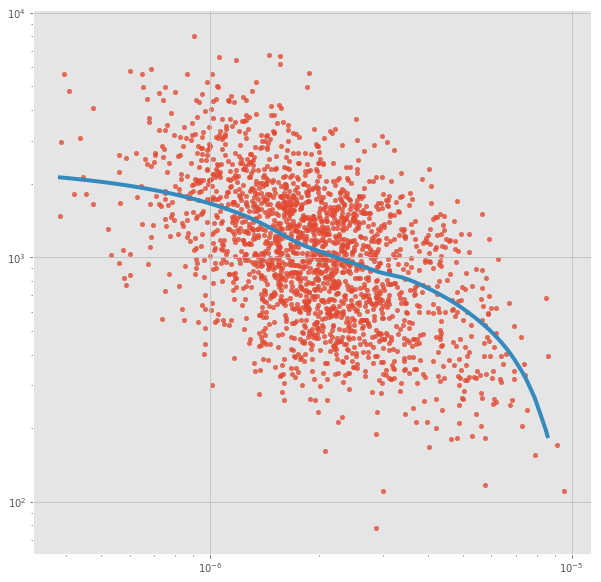

In [32]:
scatter_dicts(dict_init_rate, dict_length, xaxislabel=None, yaxislabel=None, fontsize=None, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=True,
             ylog=True)

It is elongation, so let us check the tAI!

In [33]:
tAI = pkl.load(open("../../parameters/tAI_python_chu.p", "rb"))

In [34]:
pd.DataFrame.from_dict(tAI.items()).head(n=10)

,0,1
0,YAL008W,0.386541
1,YBR255W,0.346265
2,YGR164W,0.279946
3,YGR131W,0.322574
4,YNL003C,0.334264
5,YBR135W,0.383288
6,YBR160W,0.403351
7,YJL082W,0.392114
8,YJL142C,0.263471
9,YPL191C,0.342415


In [35]:
combined = pd.merge(combined, pd.DataFrame.from_dict(tAI.items()), how='inner', left_on=['geneID'], right_on=[0])

In [36]:
combined = combined.drop(0, 1)

In [37]:
combined.rename(columns = {1: 'tAI'}, inplace=True)

In [38]:
combined.head(n=5)

,geneID,init_rate,length,transcripts,data_count_x,ribosomes,tic_toc,ribosome_speed,data_count_y,tic_toc_acceleration_percent,tic_toc_acceleration_absolute,tAI
0,YAL001C,7.602266e-07,3483,28808,9,98666,170.367115,7.004662,9,0.606402,-78.936111,0.364521
1,YAL003W,5.982788e-06,621,28808,9,98666,13.240694,15.894449,9,0.697395,-4.392632,0.642515
2,YAL012W,4.492416e-06,1185,28808,9,98666,40.631401,9.873428,9,0.851901,-6.695940,0.498714
3,YAL014C,5.842229e-07,768,28808,9,98666,51.493489,4.996184,9,0.831642,-9.015553,0.337420
4,YAL016W,1.918107e-06,1908,28808,9,98666,83.914482,7.783229,9,0.629797,-35.724561,0.407121


1955


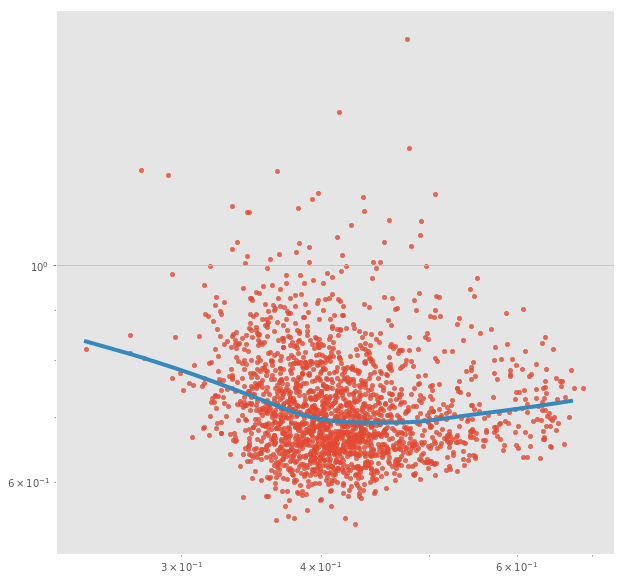

In [39]:
scatter_dicts(tAI, dict_tic_toc_acceleration_percent, xaxislabel=None, yaxislabel=None, fontsize=None, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png")

1955


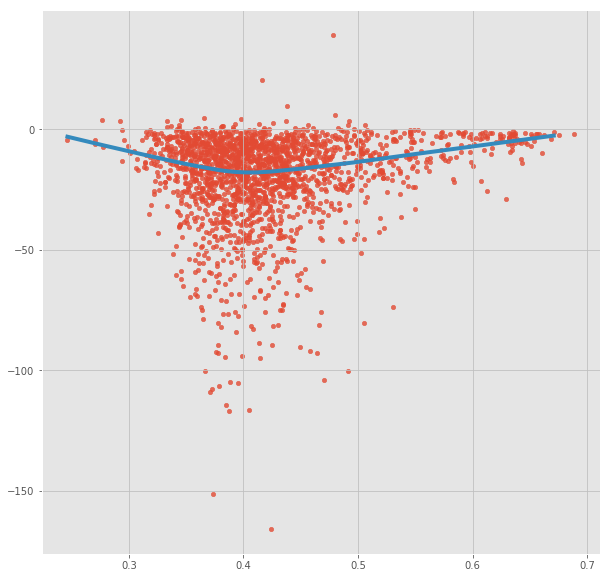

In [40]:
scatter_dicts(tAI, dict_tic_toc_acceleration_absolute, xaxislabel=None, yaxislabel=None, fontsize=None, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=False,
             ylog=False)

In [41]:
dict_tic_toc = dict(zip(combined.geneID, combined.tic_toc))

1955


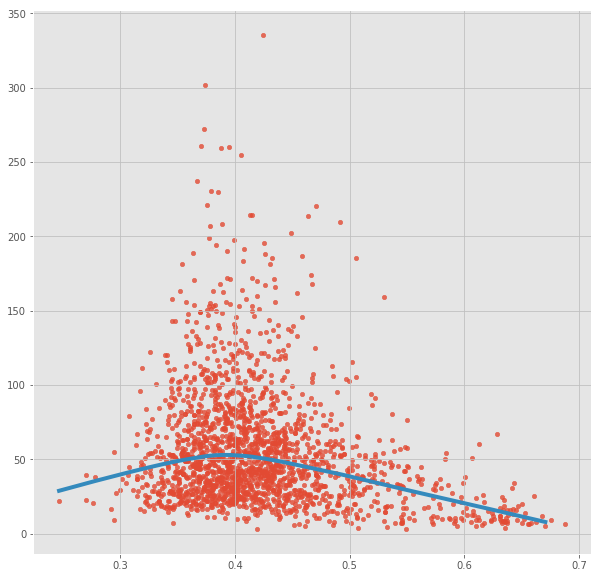

In [42]:
scatter_dicts(tAI, dict_tic_toc, xaxislabel=None, yaxislabel=None, fontsize=None, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=False,
             ylog=False)

No obvious connection with tAI, so unlikely to be a tRNA effect.